# Simple posteriors 


In [1]:
import tensorflow as tf
import tensorflow_probability as tfp
import numpy as np

In [2]:
tfd = tfp.distributions

In [3]:
generator = tfd.Binomial(total_count=60, probs = 0.6)

In [4]:
sample = generator.sample(1)

In [5]:
sample.numpy()

array([40.], dtype=float32)

In [6]:
# Uniform prior

In [7]:
n_points = 100
thetas = tf.linspace(start = 0.0, stop = 1.0, num=n_points)
prior = tf.ones(n_points)/n_points

In [8]:
models = tfd.Binomial(total_count = 60, probs = thetas)

In [9]:
likelihood = models.prob(sample)
posterior = prior * likelihood
posterior /= tf.reduce_sum(posterior)
posterior

<tf.Tensor: shape=(100,), dtype=float32, numpy=
array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 1.4780828e-34, 5.6710497e-32,
       9.5151449e-30, 8.4827344e-28, 4.5897333e-26, 1.6571013e-24,
       4.2817492e-23, 8.3501010e-22, 1.2808238e-20, 1.5967079e-19,
       1.6609288e-18, 1.4730690e-17, 1.1339444e-16, 7.6900909e-16,
       4.6529582e-15, 2.5389455e-14, 1.2609855e-13, 5.7461018e-13,
       2.4191534e-12, 9.4672230e-12, 3.4624116e-11, 1.1890203e-10,
       3.8501263e-10, 1.1799660e-09, 3.4341603e-09, 9.5199306e-09,
       2.5204832e-08, 6.3888720e-08, 1.5538623e-07, 3.6333620e-07,
       8.1827568e-07, 1.7778266e-06, 3.7318775e-06, 7.5787375e-06,
       1.4908291e-05, 2.8438117e-05, 5.2657255e-05, 9.4730021e-05,
       1.6571056e-04, 2.8207462e-04, 4.6754026e-04, 7.5504067e-04,
       1.1886164e-03, 1.8248697e-03, 2.7334408e-03, 3.9959443e-03,
       5.7026986e-03, 7.9465816e-03, 1.0814061e-02, 1.4373052e-02,
       1.86585

In [10]:
import matplotlib.pyplot as plt

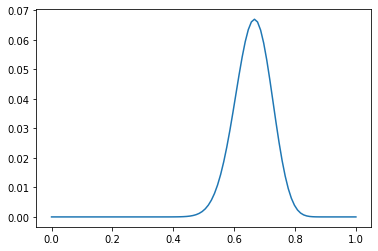

In [11]:
plt.plot(thetas, posterior)

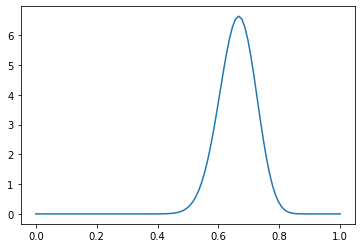

In [12]:
import scipy.stats
plt.plot(thetas, scipy.stats.beta.pdf(thetas, 1 + sample, 1 + 60 - sample))